# Imports

In [1]:
import os

from models import get_all_models, make_model
from utils.loss import loss
from utils.misc import get_device, seed_everyting
from utils.models import test
from utils.pipeline import get_data
from utils.plots import (
    plot_image_and_prediction,
    plot_image_channels,
    plot_labels_in_germany,
    plot_predictions,
    plot_true_vs_predicted_histogram,
    plot_true_vs_predicted_scatter,
)
from utils.predictions import predict_batch, predict_image
from utils.transforms import scale

# Global parameters

In [2]:
image_size = 256
img_dir = "data/images"
weights_dir = "weights"
patch_dir = "data/patches"
results_dir = "results"
gedi_dir = "data/gedi"
random_state = 42
batch_size = 8
num_workers = os.cpu_count() // 2
bins = list(range(0, 55, 5))
device = get_device()

seed_everyting(random_state)

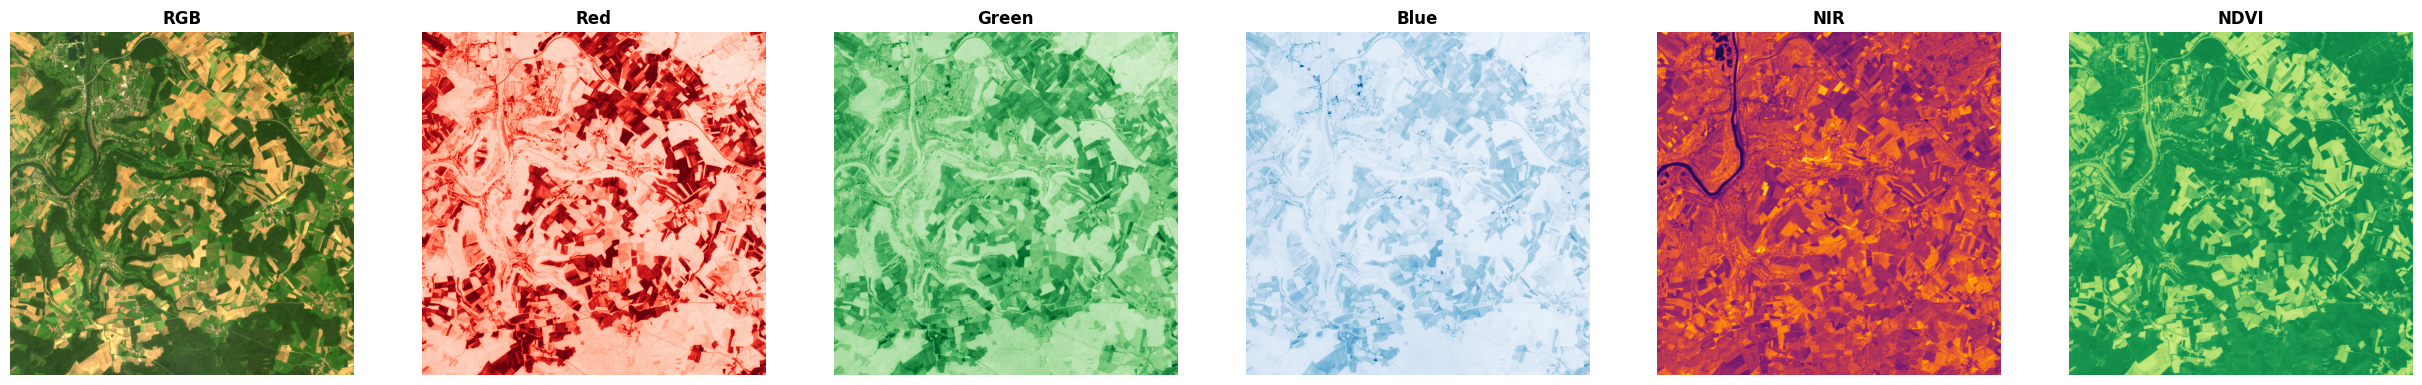

In [3]:
plot_image_channels(f"{img_dir}/L15-1060E-1348N.tif")

In [4]:
# plot_labels_in_germany()

In [5]:
# Plot histogram of labels
# TODO

# Create dataloaders

In [6]:
# Create dataloaders
_, _, test_dl = get_data(
    img_dir, patch_dir, gedi_dir, image_size, batch_size, num_workers, bins
)

2023-11-22 21:48:09,368 Starting preprocessing...
2023-11-22 21:48:09,369 Directories validated.
2023-11-22 21:48:09,370 Images loaded.
2023-11-22 21:48:09,375 Number of images: 48
2023-11-22 21:48:20,283 GEDI data loaded.
2023-11-22 21:48:20,317 Loaded existing patch info file. Skipping image processing.
2023-11-22 21:48:20,317 Number of patches: 26690
2023-11-22 21:48:20,318 Number of labels: 2012084


# Load models

In [7]:
models = {
    name: make_model(name).load(os.path.join(weights_dir, f"{name}.pt")).to(device)
    for name in get_all_models()
    if os.path.exists(os.path.join(weights_dir, f"{name}.pt"))
}

# Visualise results

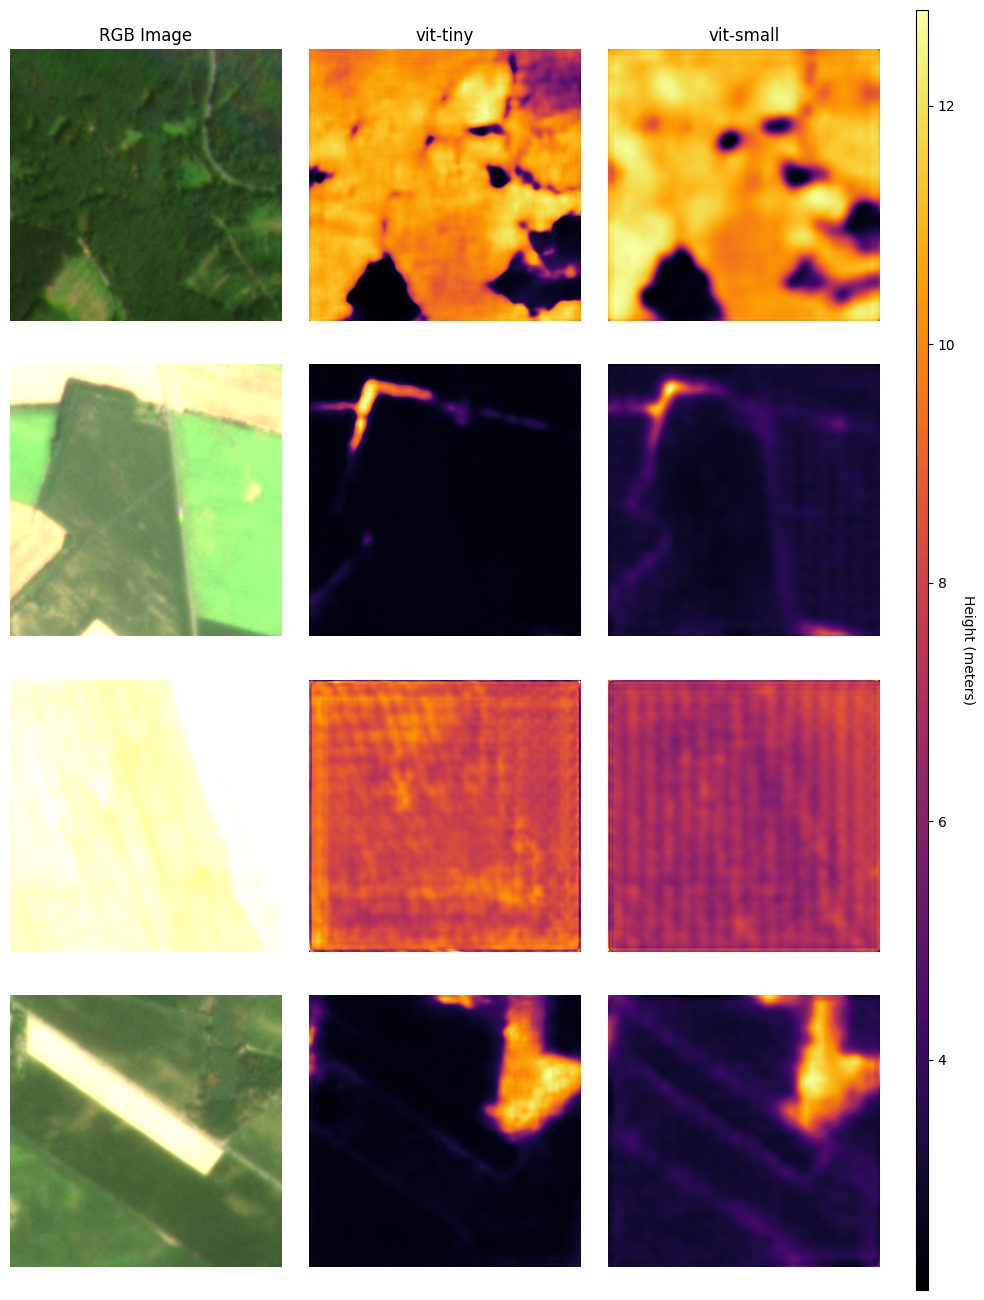

In [8]:
plot_predictions(*predict_batch(models, test_dl, device))

# Select model

In [13]:
model_name = "vit-tiny"
model = models[model_name]

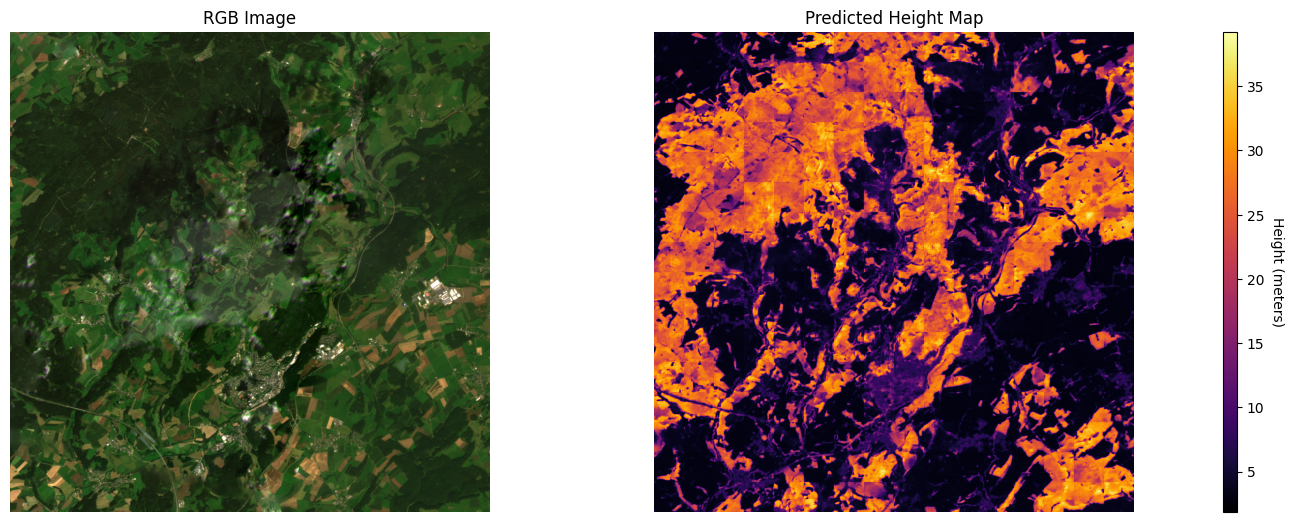

In [14]:
img, pred = predict_image(f"{img_dir}/L15-1060E-1355N.tif", model, device, image_size)
plot_image_and_prediction(scale(img), pred)

# Evaulate model

Testing:   0%|          | 0/76 [00:00<?, ?it/s]

Testing: 100%|██████████| 76/76 [01:12<00:00,  1.05it/s]


Final test loss: 1.606414
Final MAE loss: 2.448072
Final RMSE loss: 4.486117
Ranges: [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
Losses by range: [0.8715939 2.1817198 2.7525032 2.6246767 1.9947474 2.8397982 6.149382
 8.147922  8.138724  5.490654 ]


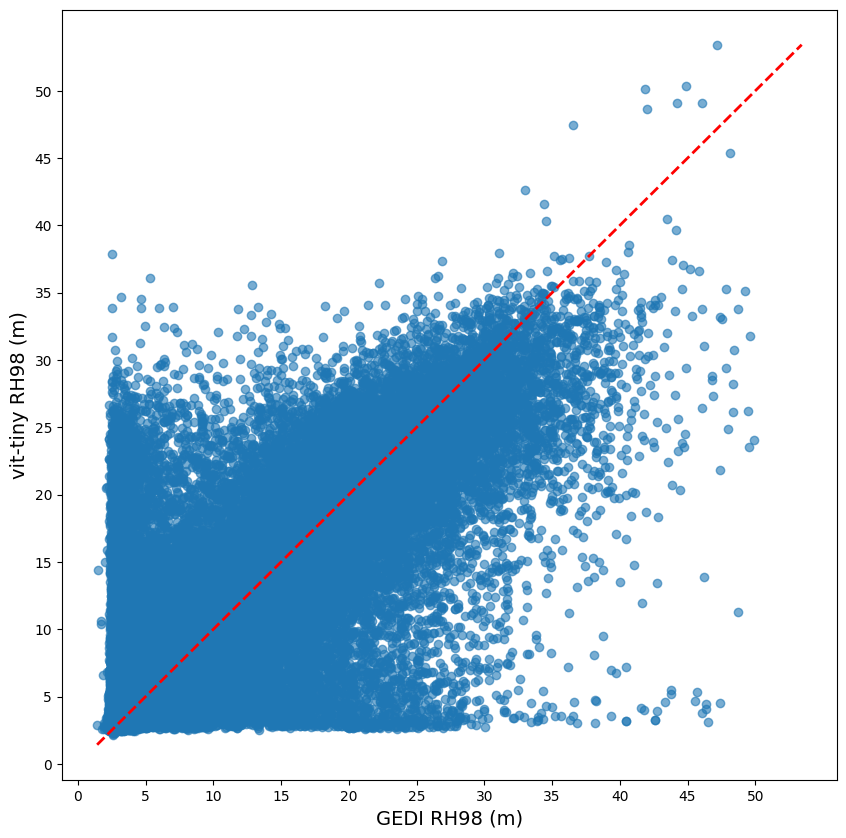

In [15]:
metrics = test(model, test_dl, loss, device, bins)

print(
    f"Final test loss: {metrics.get('total'):>8f}\n"
    f"Final MAE loss: {metrics.get('mae'):>8f}\n"
    f"Final RMSE loss: {metrics.get('rmse'):>8f}\n"
    f"Ranges: {bins}\n"
    f"Losses by range: {metrics.get('loss_by_range')}"
)

plot_true_vs_predicted_scatter(
    metrics.get("targets"),
    metrics.get("predicted"),
    model_name,
)

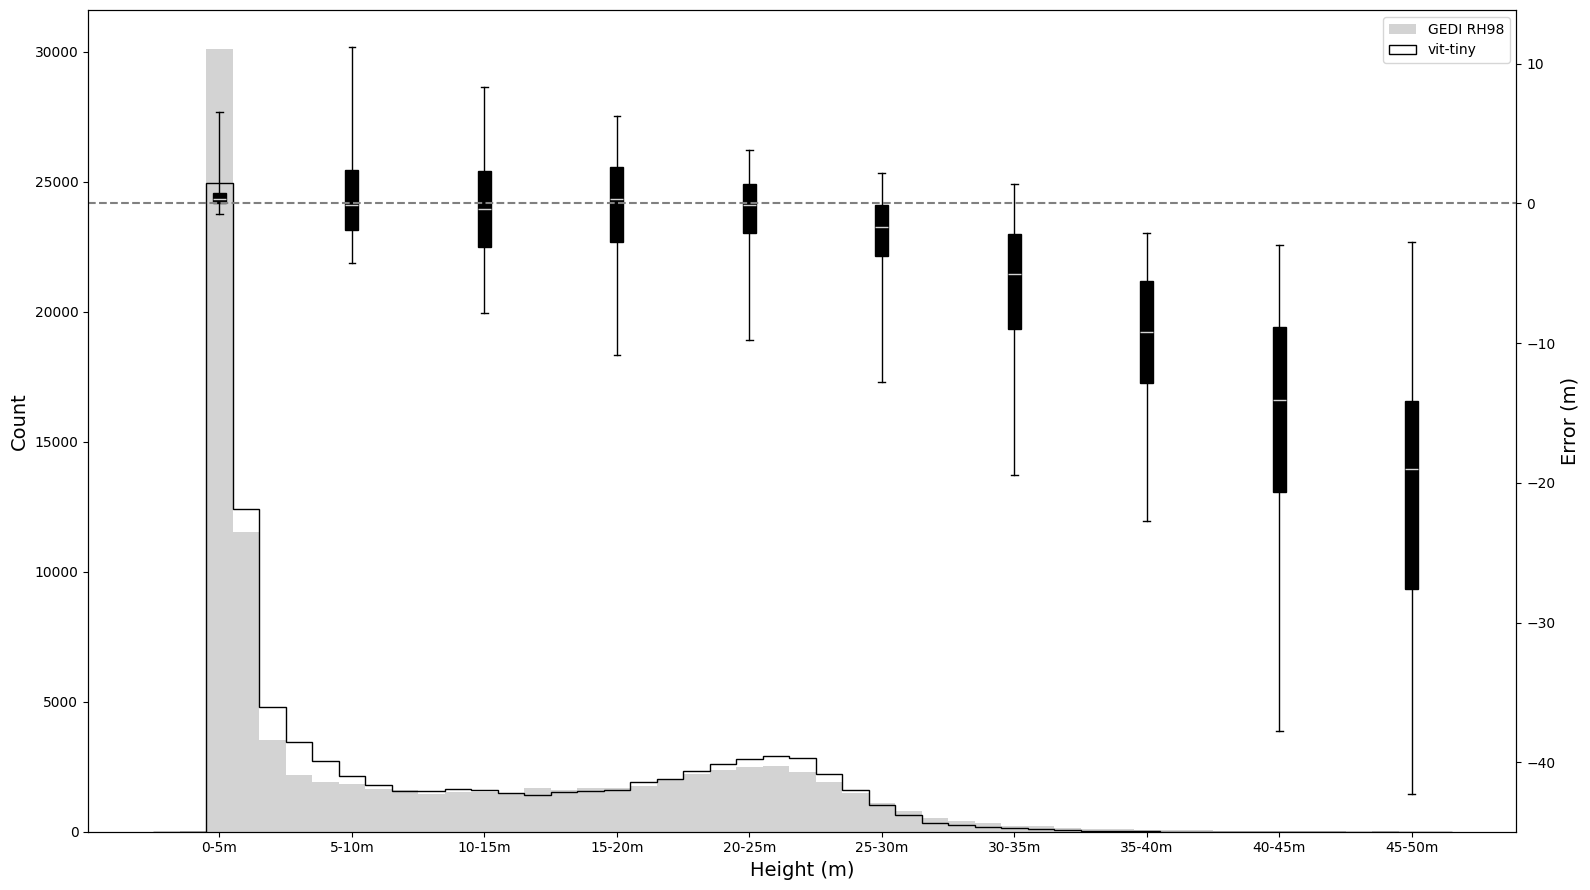

In [16]:
plot_true_vs_predicted_histogram(
    metrics.get("targets"),
    metrics.get("predicted"),
    model_name,
)